In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer


In [2]:
# DATA_SOURCE = "yahoo"
COMPANY = 'CBA.AX'

TRAIN_START = '2020-01-01'     # Start date to read
TRAIN_END = '2023-08-01'       # End date to read

In [3]:
import yfinance as yf

# Get the data for the stock AAPL
data = yf.download(COMPANY,TRAIN_START,TRAIN_END)

C:\Users\ishan\AppData\Local\Temp\ipykernel_46808\1437991701.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(COMPANY,TRAIN_START,TRAIN_END)
[*********************100%***********************]  1 of 1 completed


In [4]:
PRICE_VALUE = "Close"

scaler = MinMaxScaler(feature_range=(0, 1)) 
# Note that, by default, feature_range=(0, 1). Thus, if you want a different 
# feature_range (min,max) then you'll need to specify it here
scaled_data = scaler.fit_transform(data[PRICE_VALUE].values.reshape(-1, 1)) 
# Flatten and normalise the data
# First, we reshape a 1D array(n) to 2D array(n,1)
# We have to do that because sklearn.preprocessing.fit_transform()
# requires a 2D array
# Here n == len(scaled_data)
# Then, we scale the whole array to the range (0,1)
# The parameter -1 allows (np.)reshape to figure out the array size n automatically 
# values.reshape(-1, 1) 
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape'
# When reshaping an array, the new shape must contain the same number of elements 
# as the old shape, meaning the products of the two shapes' dimensions must be equal. 
# When using a -1, the dimension corresponding to the -1 will be the product of 
# the dimensions of the original array divided by the product of the dimensions 
# given to reshape so as to maintain the same number of elements.

# Number of days to look back to base the prediction
PREDICTION_DAYS = 60 # Original

# To store the training data
x_train = []
y_train = []

scaled_data = scaled_data[:,0] # Turn the 2D array back to a 1D array
# Prepare the data
for x in range(PREDICTION_DAYS, len(scaled_data)):
    x_train.append(scaled_data[x-PREDICTION_DAYS:x])
    y_train.append(scaled_data[x])

# Convert them into an array
x_train, y_train = np.array(x_train), np.array(y_train)
# Now, x_train is a 2D array(p,q) where p = len(scaled_data) - PREDICTION_DAYS
# and q = PREDICTION_DAYS; while y_train is a 1D array(p)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# We now reshape x_train into a 3D array(p, q, 1); Note that x_train 
# is an array of p inputs with each input being a 2D array 


In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25


c:\Users\ishan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1505
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0136
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0074
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0081
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0075
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0075
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0072
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0062
Epoch 9/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0067
Epoch 10/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0061
Epoch 11/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0061
Epoch 12/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0063
Epoch 13/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0056
Epoch 14/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0058
Epoch 15/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0059
Epoch 16/25
27/

In [6]:
TEST_START = '2023-08-02'
TEST_END = '2024-07-02'

# test_data = web.DataReader(COMPANY, DATA_SOURCE, TEST_START, TEST_END)

test_data = yf.download(COMPANY,TEST_START,TEST_END)


# The above bug is the reason for the following line of code
# test_data = test_data[1:]

actual_prices = test_data[PRICE_VALUE].values

total_dataset = pd.concat((data[PRICE_VALUE], test_data[PRICE_VALUE]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - PREDICTION_DAYS:].values
# We need to do the above because to predict the closing price of the fisrt
# PREDICTION_DAYS of the test period [TEST_START, TEST_END], we'll need the 
# data from the training period

model_inputs = model_inputs.reshape(-1, 1)
# TO DO: Explain the above line

model_inputs = scaler.transform(model_inputs)



C:\Users\ishan\AppData\Local\Temp\ipykernel_46808\2601071261.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test_data = yf.download(COMPANY,TEST_START,TEST_END)
[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


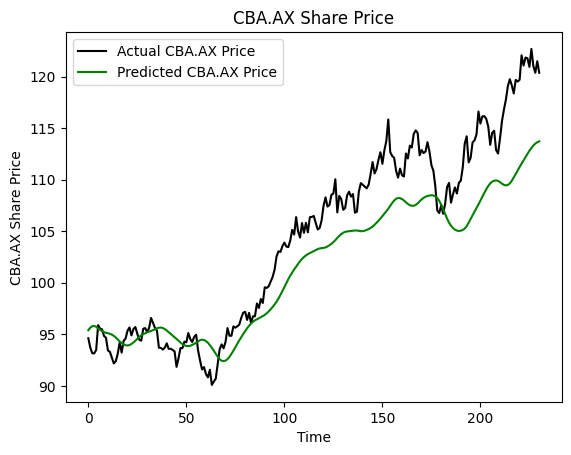

In [7]:
x_test = []
for x in range(PREDICTION_DAYS, len(model_inputs)):
    x_test.append(model_inputs[x - PREDICTION_DAYS:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# TO DO: Explain the above 5 lines

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(actual_prices, color="black", label=f"Actual {COMPANY} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {COMPANY} Price")
plt.title(f"{COMPANY} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{COMPANY} Share Price")
plt.legend()
plt.show()


In [8]:
real_data = [model_inputs[len(model_inputs) - PREDICTION_DAYS:, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: [[113.74843]]
